In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Get Data

We download historical financial market data for five assets, namely SPY (S&P 500 ETF), GOOG (Google), AAPL (Apple), BTC-USD (Bitcoin), and ADA-USD (Cardano) as well as ETH-USD (Ethereum). We use the Yahoo Finance API and pandas-datareader library to download the data between January 1, 2019, and December 31, 2022, at daily intervals. The fetched data is automatically adjusted for any stock splits or dividends. We keep the closing prices.


In [4]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SPY GOOG AAPL BTC-USD ADA-USD ETH-USD",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        start="2019-01-01",
        end="2022-12-31",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )
data.index = pd.to_datetime(data.index)
data = data["Close"]

[*********************100%***********************]  6 of 6 completed


In [5]:
data.dropna()

,AAPL,ADA-USD,BTC-USD,ETH-USD,GOOG,SPY
Date,,,,,,
2019-01-02,37.994484,0.045258,3943.409424,155.047684,52.292500,232.308746
2019-01-03,34.209957,0.042682,3836.741211,149.135010,50.803001,226.765259
2019-01-04,35.670357,0.043812,3857.717529,154.581940,53.535500,234.360931
2019-01-07,35.590969,0.047996,4025.248291,151.699219,53.419498,236.208755
2019-01-08,36.269436,0.048525,4030.847900,150.359634,53.813999,238.428024
...,...,...,...,...,...,...
2022-12-23,131.477127,0.259429,16796.953125,1220.159424,89.809998,380.042480
2022-12-27,129.652435,0.260370,16717.173828,1212.791626,87.930000,378.543793
2022-12-28,125.674026,0.248378,16552.572266,1189.986084,86.459999,373.839294


<Axes: xlabel='Date'>

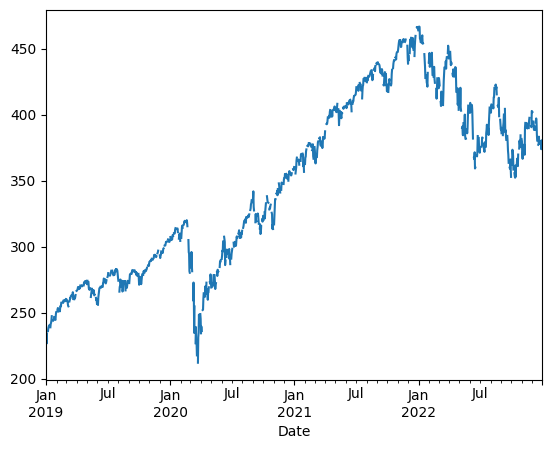

In [6]:
data["SPY"].plot()

<Axes: xlabel='Date'>

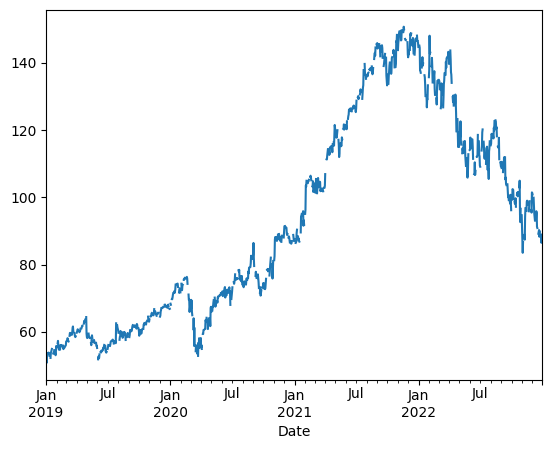

In [7]:
data["GOOG"].plot()

We extract the daily returns of each series to get a series of returns for each stock or cryptocurrency.

In [8]:
returns = data.dropna().pct_change().dropna()

In [ ]:
returns

,AAPL,ADA-USD,BTC-USD,ETH-USD,GOOG,SPY
Date,,,,,,
2019-01-03,-0.099607,-0.056918,-0.027050,-0.038135,-0.028484,-0.023863
2019-01-04,0.042689,0.026475,0.005467,0.036523,0.053786,0.033495
2019-01-07,-0.002226,0.095499,0.043427,-0.018648,-0.002167,0.007885
2019-01-08,0.019063,0.011022,0.001391,-0.008831,0.007385,0.009395
2019-01-09,0.016982,0.075095,0.001104,0.002949,-0.001505,0.004673
...,...,...,...,...,...,...
2022-12-23,-0.002798,0.011328,-0.001984,0.001623,0.017562,0.005752
2022-12-27,-0.013878,0.003627,-0.004750,-0.006038,-0.020933,-0.003943
2022-12-28,-0.030685,-0.046058,-0.009846,-0.018804,-0.016718,-0.012428


Here is a histogram of the returns for SPY. We see that it is bell-shaped, resembling a normal distribution, though it looks like the peak at 0.00 is rather higher than expected.

<Axes: >

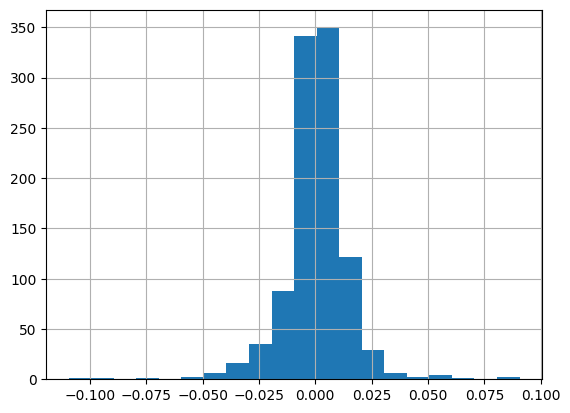

In [ ]:
returns["SPY"].hist(bins=20)

Here is a plot of the returns for all series (AAPL, Bitcoin, ADA (Cardano), Etherium, Google, and SPY).

<Axes: xlabel='Date'>

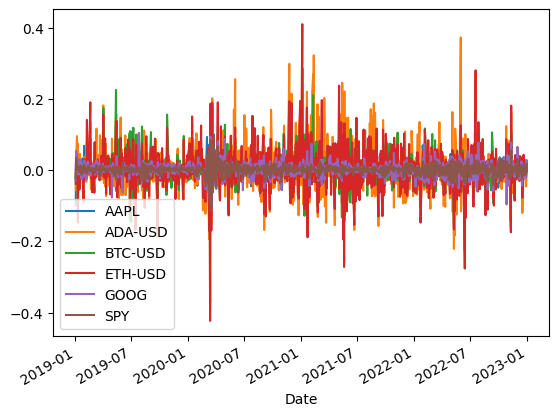

In [ ]:
returns.plot()

We get another series which shows the dispersion of the daily average returns.

In [9]:
data2 = returns.std(axis=1)

Text(0.5, 1.0, 'Dispersion of Daily Returns (std dev)')

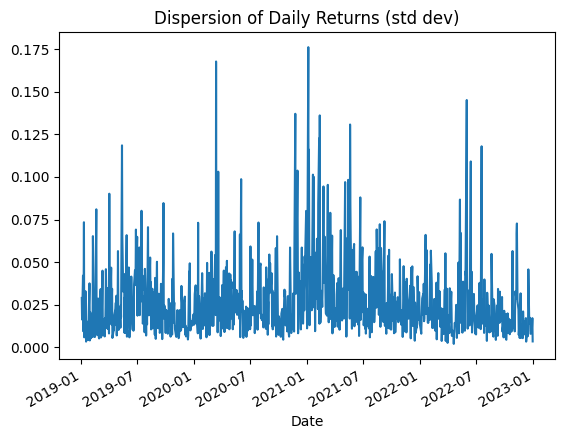

In [ ]:
data2.plot()
plt.title("Dispersion of Daily Returns (std dev)")

We can see several peaks where the dispersion of returns; we see one around February and March 2020, an another around January 2021, and another large peak in June and July 2022.

<Axes: >

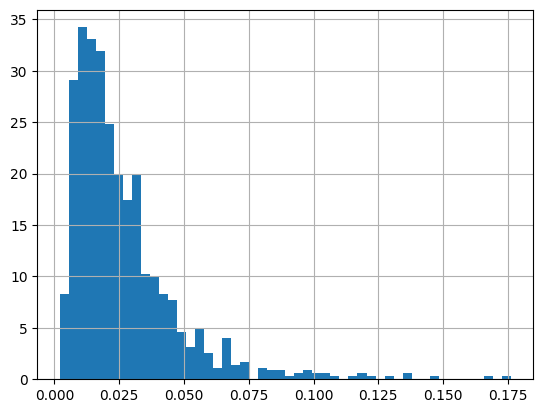

In [ ]:
data2.hist(bins=50, density=True)

Since the standard deviation is always positive, it is helpful to perform a logarithmic transformation of the data when modelling.

In [18]:
data3 = np.log(100 * data2)

Text(0.5, 1.0, 'Dispersion of Daily Returns After Log-Transform')

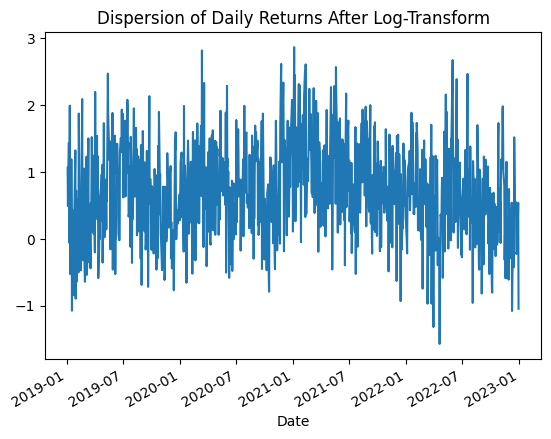

In [ ]:
data3.plot()
plt.title("Dispersion of Daily Returns After Log-Transform")

If we look at a histogram of the data after transform it more closely resembles a

Text(0.5, 1.0, 'Histogram of Disperson of Daily Returns')

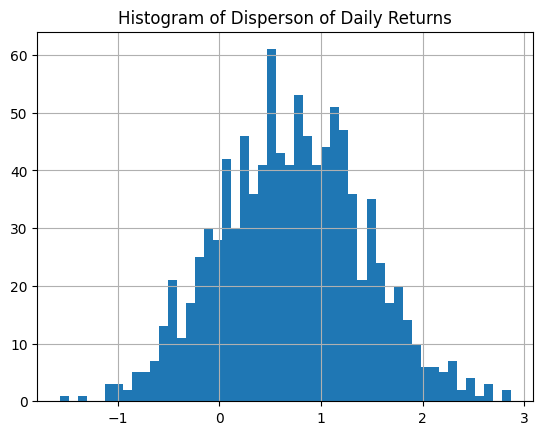

In [ ]:
data3.hist(bins=50)
plt.title("Histogram of Disperson of Daily Returns")

We model the series as a hidden Markov process.

$$ y_t = \epsilon_t$$ where $\epsilon_t$ follows a normal distribution with mean $\mu_i$, and $\sigma_i$.  The mean and standard deviation depend on the realization of the hidden Markov process.

In [19]:
YData = data3.dropna()

In [ ]:
YData

Date
2019-01-03    1.065324
2019-01-04    0.492613
2019-01-07    1.438047
2019-01-08   -0.054307
2019-01-09    1.078009
                ...   
2022-12-23   -0.224661
2022-12-27   -0.154414
2022-12-28    0.310597
2022-12-29    0.541710
2022-12-30   -1.042334
Length: 1007, dtype: float64

# Define Functions

We first define some functions for computing likelihoods given values for the parameters of the Markov model.

Let $\xi_{t|T}(j)=\mathbf{Pr}(s_t=j|\mathcal{Y}_{T};\theta)$.


The log-likelihood function can be expressed as: \begin{align} \mathcal{L}(\theta) = \sum_{t=1}^T \log\ f(y_t|\mathcal{Y}_{t-1};\theta) = \sum_{t=1}^T \log\ \sum_{i=1}^N \xi_{t|T}(i) \times \phi_{t}(i) \end{align} where $\phi_{t}(i)=\phi\left(\frac{y_t-\mu_i}{\sigma_i}\right)$.

We first create a function that computes the log-likelihood of a single observation, given values for $\xi$, $\mu$, and $\sigma$ using the probability density function of the normal distribution.

In [11]:
def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like

We use this function to implement another function that computes the log-likelihood of a series by summing the likelihoods for each observation.

Given the number of observations ('n') and the total number of parameters ('k') involved in the model as well as the log-likelihood, we can compute two information criteria: Akaike Information Criterion (AIC) and Schwarz Bayesian Information Criterion (BIC) which can be utilized for model selection and evaluation.

In [12]:
def log_likelihood2(xi_prob, T, pi_hat0, P, mu, sigma, Y):
  y_like = np.zeros(T)
  for tt in range(0, T):
    y_like[tt] = likelihood(xi_prob[tt,:], mu, sigma, Y[tt])
  sum_log_like = np.sum(np.log(y_like))
  n = len(Y)
  k = (np.prod(mu.shape) + np.prod(sigma.shape))
  k += (np.prod(pi_hat0.shape) + np.prod(P.shape))
  akaike = 2 * k - 2 * sum_log_like
  schwarz = k * np.log(n) - 2 * sum_log_like
  return sum_log_like, akaike, schwarz


To estimate the model, we use a recursive algorithm that computes the optimal forecasts $\xi_{t+1|t}(j)=\mathbb{P}(s_{t+1}=j|\mathcal{Y}_{t};\theta)$:
$$
\begin{align}
& \xi_{t|t}(i) = \frac{\xi_{t|t-1}(i)\phi_{t}(i)}{f(y_{t}|\mathcal{Y}_{t-1};\theta)} \\
& \xi_{t+1|t}(j) = \sum_{i=1}^N p_{ij} \xi_{t|t}(i)
\end{align}
$$

We can step forward until we have gone through all observations.

In [13]:
# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


We can iterate in reverse order to find the conditional probabilities given all information at time $T$

$$\xi_{t|T}(i) = \sum_{j=1}^N { p_{ij}\xi_{t|t}(i)\xi_{t+1|T}(j) \over \xi_{t+1|t}(j)}$$

In [14]:
# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1



Once we have computed the $\xi$ we can compute the estimate for the mean for each state by using a weighted average across time steps:
$$
\begin{align}
\mu_i^{(k)} = \frac{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) y_t}{\sum_{i=1}^M \xi_{t|T}^{(k-1)}(i)}
\end{align}
$$

To compute the estimate for the standard deviation, we compute the values of $\sigma_i$ that have the maximum likelihood.  We do this by taking the expression for the likelihood, finding its derivative and setting it to zero.
$$
\begin{align}
\frac{\partial \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)\ log\ \phi_{it}}{\partial \sigma_i} = \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)\ \left(\frac{(y_t-\mu_i)^2}{\sigma_i^2}-1\right) = 0
\end{align}
$$


Solving for $\sigma_i$ we obtain:

$$
\begin{align}
\sigma_i^{(k)} = \sqrt{\frac{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \left(y_t-\mu^{(k)}_{-1}\right)^2}{\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)}}
\end{align}
$$
The expression is just the squared root of a weighted average of the squared deviations of the process, where the weights are the relative estimated probability of state $i$ occurring. Differentiation with respect to $\mu_i^{(k)}$ yields:
$$
\begin{align}
\sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \frac{y_t-\mu_i^{(k)}}{\left(\sigma_i^{(k)}\right)^2} = 0
\end{align}
$$

Finally, we can show that the estimates for the transition matrix and the initial distribution are given by:
$$
\begin{align}
& p_{ij}^{(k)} = \frac{\sum_{t=2}^T p_{ij}^{(k-1)}\xi_{t-1|t-1}(i)\xi_{t|T}(j)/\xi_{t|t}(j)}{\sum_{t=2}^T \xi_{t-1|T}^{(k-1)}(i)} \\
& \pi_i^{(k)} = \xi_{1|T}^{(k-1)}(i)
\end{align}
$$

In [15]:
def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

To calculate a hidden Markov model, we create a sequence of estimates for the parameters.

We start with an inital guess, estimate likelihoods based on this guess, and then use these likelihoods to find a new guess.  We iterate until our estimate for the parameters is not improving the log-likelihood.

[0.31628635 0.90136069] [0.64418944 0.65788365] [[0.97105444 0.02894556]
 [0.01335374 0.98664626]] [1.00000000e+00 7.26297421e-18]
-1461.8427273200568 2943.6854546401137 2992.8327635672995



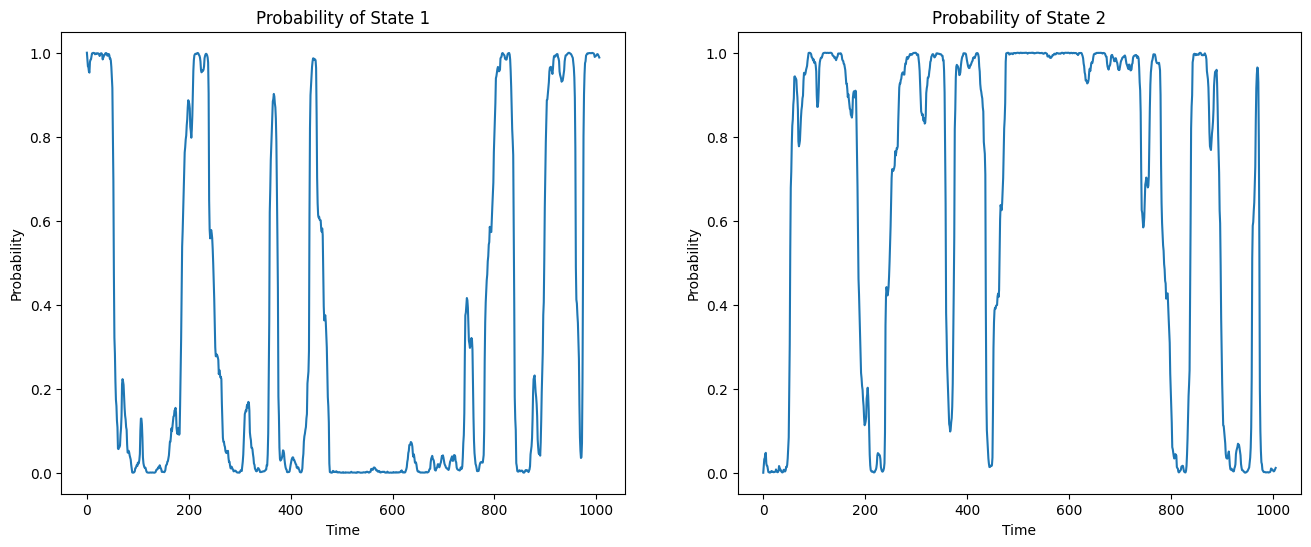

In [20]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [0.5, 1.5] * np.ones((N))
sigma_hat0 = [0.1, 0.1] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    #if (ite%25 == 0):
    #  plt.subplot(1, 2, 1)
    #  plt.plot(xi_prob_T[:, 0])
    #  plt.title("Probability of State 1")
    #  plt.xlabel("Time")
    #  plt.subplot(1, 2, 2)
    #  plt.plot(xi_prob_T[:, 1])
    #  plt.title("Probability of State 2")
    #  plt.xlabel("Time")
    #  fig = plt.gcf()
    #  fig.set_size_inches(16, 6)
    #  plt.show()
    #  print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    log_like1, akiakie, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 =  M_step_func(xi_prob_T, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break

print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.xlabel("Time")
plt.ylabel("Probability")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

If we use a two-state model we get that

* $(\mu_1, \mu_2) = (0.31628688, 0.90136115)$
* $(\sigma_1, \sigma_2) = (0.64418955, 0.65788356)$
* $P = \pmatrix{0.9710544 & 0.02894566 \cr 0.01335379 & 0.98664621}$

and that we are almost certainly in the first state at the beginning of 2019.

We get a log-likelihood of -1461.842, an AIC of 2943 and a BIC of 2992.83.

# Models with Different Numbers of States

[-0.45479367 -0.06057968 -0.5117213   0.71610861] [0.13497082 0.30932794 0.11926565 0.70797806] [[1.10559200e-05 2.74508942e-04 7.54501009e-04 9.98959934e-01]
 [2.04099198e-07 3.81174231e-05 2.55589904e-06 9.99959123e-01]
 [7.28915556e-05 2.14312967e-03 2.71411874e-03 9.95069860e-01]
 [6.88259697e-10 1.56683911e-06 1.94336995e-09 9.99998431e-01]] [1.06353248e-227 2.30179659e-037 1.70597076e-232 1.00000000e+000]
-1428.8722782799005 2913.744556559801 3051.3570215559207



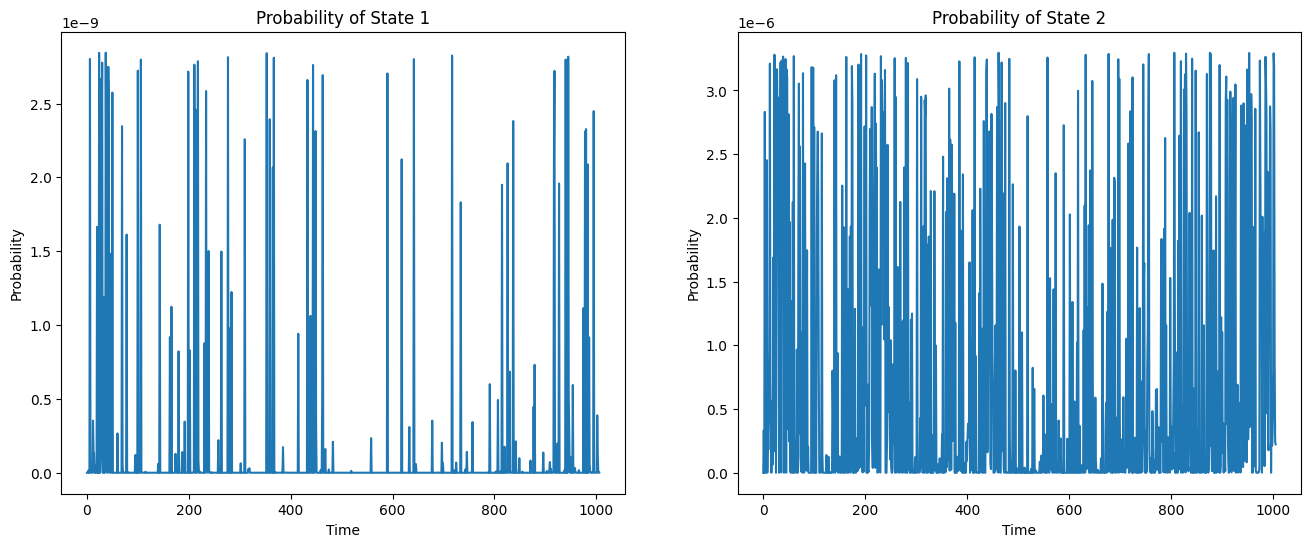

In [48]:
# Initialize parameters
T = len(YData)
N = 4

# SET INITIAL GUESSES

mu_hat0 = [-0.5, 0.5, -1, 1] * np.ones((N))
sigma_hat0 = [0.3, 0.3, 0.3, 0.3] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0 = np.array([[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]])

pi_hat0 = [0.25,  0.25, 0.25, 0.25] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    #print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )


    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    log_like1, akiakie, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 =  M_step_func(xi_prob_T, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break


print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.xlabel("Time")
plt.ylabel("Probability")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

* $(\mu_1, \mu_2, \mu_3, \mu_4) = -0.45478953 -0.06057576 -0.51172483  0.71610863$
* $(\sigma_1, \sigma_2, \sigma_3, \sigma_4) = (0.1349792,  0.30932745, 0.119266,   0.70797808)$



If we introduce four states, we do not get an improvement in the loss function; the AIC and BIC are higher, indicating that the extra complexity does not pay off.  We can see that we are almost always in the second state; the probability of ever being in state 1, 3, or 4 is very small.

The transition state diagram is

\begin{bmatrix}
1.10576881 \times 10^{-5} & 2.74488495 \times 10^{-4} & 7.54432636 \times 10^{-4} & 9.98960021 \times 10^{-1} \\
2.04135227 \times 10^{-7} & 3.81155728 \times 10^{-5} & 2.55572183 \times 10^{-6} & 9.99959125 \times 10^{-1} \\
7.29170707 \times 10^{-5} & 2.14303276 \times 10^{-3} & 2.71416770 \times 10^{-3} & 9.95069882 \times 10^{-1} \\
6.88389690 \times 10^{-10} & 1.56680291 \times 10^{-6} & 1.94308104 \times 10^{-9} & 9.99998431 \times 10^{-1}
\end{bmatrix}

which indicates that we almost always stay in the fourth state.

[ 0.71610796 -0.44729674 -0.0638046 ] [0.70797809 0.1855899  0.33044443] [[9.99999359e-01 1.81100425e-07 4.60392368e-07]
 [9.86483789e-01 1.30024398e-02 5.13771504e-04]
 [9.99238011e-01 5.20601646e-04 2.41386911e-04]] [1.00000000e+000 5.42429699e-123 4.77330188e-027]
-1428.8717351472417 2893.7434702944834 2982.2086263634174



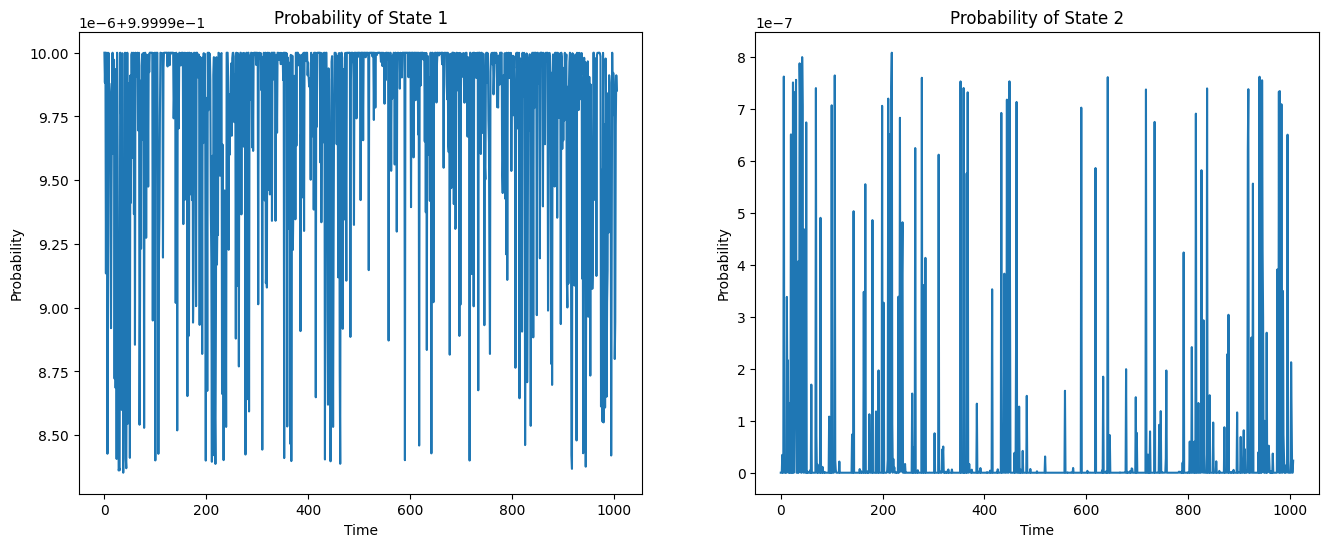

In [49]:
# Initialize parameters
T = len(YData)
N = 3

# SET INITIAL GUESSES

mu_hat0 = [1.5, -0.5, 1] * np.ones((N))
sigma_hat0 = [0.3, 0.3, 0.3] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0 = np.array([[0.75, 0.25, 0.25], [0.25, 0.75, 0.25], [0.25, 0.25, 0.75]])

pi_hat0 = [0.33, 0.33, 0.34] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    #print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )


    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    log_like1, akiakie, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 =  M_step_func(xi_prob_T, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break


print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.xlabel("Time")
plt.ylabel("Probability")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.xlabel("Time")
plt.ylabel("Probability")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

Using three states instead of four also yields a similar result where almost alwaysstay in one state.  We get some decrease in AIC and BIC but because the chance of leaving state one is on the order of $10^{-7}$ it looks like using more than two steps does not help the model.


# Models with Same Sigma, Different Mu

When $\sigma$ is constant across all states, we want to choose $\sigma$ to maximize the likelihood. To do this, we can calculate the log-likelihood as a function of $\sigma$ and set the derivative to zero. This yields the following first-order condition.

$${\partial \sum_{i=1}^N \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \log(\phi_{it}) \over \partial \sigma } = \sum_{i=1}^N \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \left( { (y_t - \mu_i)^2 \over \sigma^2 - 1 } \right) = 0$$

If we solve for $\sigma$ we get

$$\sigma = \sqrt{{\sum_{i=1}^N \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \left( y_t - \mu_i^{(k)} \right)^2 \over T}}$$



In [26]:
# Hamilton filtering
def forward_alg_v2(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma)
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma)
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

In [27]:
def M_step_func_v2(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = 0.0
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat += xi_y_mu2

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]
    sigma_hat = np.array([np.sqrt(sigma_hat / T)])
    return mu_hat, sigma_hat, P_hat, pi_hat

[0.45465457 1.05036098] [0.64330529] [[0.96775704 0.03224296]
 [0.04339861 0.95660139]] [6.18246624e-07 9.99999382e-01]
-1476.9784204178482 2971.9568408356963 3016.1894188701635



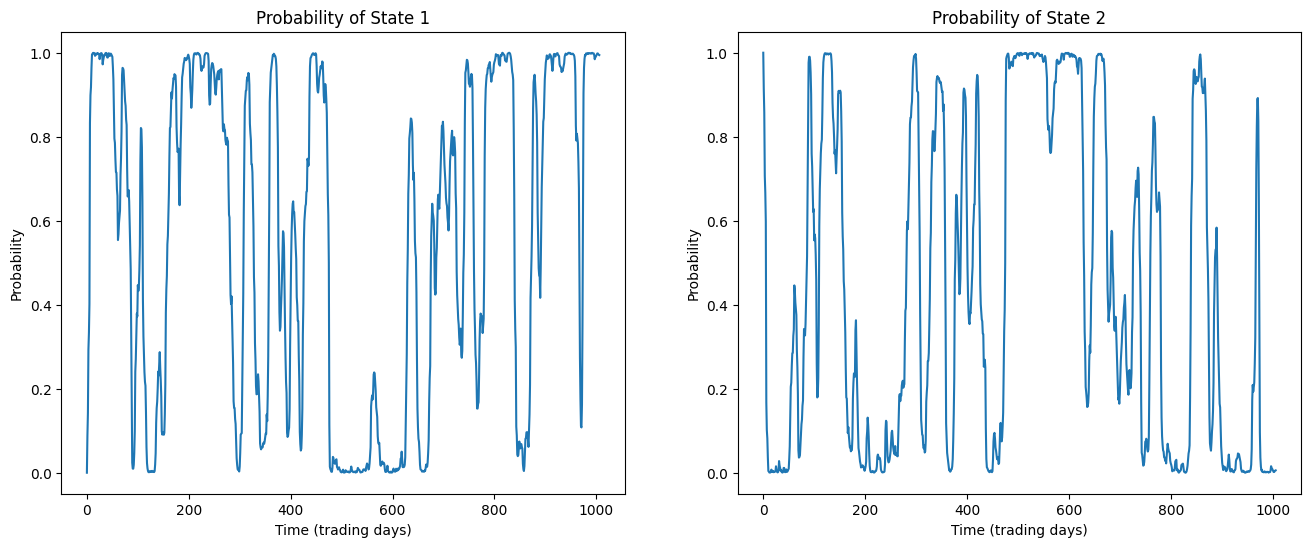

In [47]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [0.5, 1.5] * np.ones((N))
sigma_hat0 = np.array([0.1])
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    #print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg_v2(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    #print("")
    #plt.subplot(1, 2, 1)
    #plt.plot(xi_prob_T[:, 0])
    #plt.subplot(1, 2, 2)
    #plt.plot(xi_prob_T[:, 1])
    #fig = plt.gcf()
    #fig.set_size_inches(16, 6)
    #plt.show()
    #print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    log_like1, akiakie, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 =  M_step_func_v2(xi_prob_T, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break

print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

If we force $\sigma$ to be the same for both states we get an estimate of $\sigma = 0.645$; we still have two states, one with mean $\mu_1 = 0.481$ and one with mean $\mu_2 = 1.077$

We get this transition matrix which indicates that we switch states with probability around 3-4 per cent (starting in the second state, with the higher dispersion).
\begin{bmatrix}
0.96775707 & 0.03224293 \\
0.0433986 & 0.9566014
\end{bmatrix}

It looks like the AIC and BIC are higher; this is because there are only two states, so we only add one parameter by letting $\sigma$ vary, so the simplification won't make up for the difference in log-likelihood.

# Models with Same Mu, Different Sigma

If $\mu$ is the same across all states, then to maximize likelihood

$$ { \partial \sum_{i=1}^N \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) \log(\phi_{it}) \over \partial \mu^{(k)} } = \sum_{t=1}^T \sum_{i=1}^N \xi_{t|T}^{(k-1)}(i) { y_t - \mu^{(k)} \over (\sigma_i^{(k)})^2 } = 0$$

$$\mu^{(k)} = {  \sum_{i=1}^N \sum_{t=1}^T {\xi_{t|T}^{(k-1)} y_t \over (\sigma_i^{(k)})^2 } \over \sum_{i=1}^N \sum_{t=1}^T {\xi_{t|T}^{(k-1}(i) \over (\sigma_{i}^{(k)})^2 } }$$

$$\sigma_i^{(k)} = \sqrt{ { \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) (y-\mu^{(k)})^2 \over \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i)}}$$

To simplify calculations we use the previous $\sigma$ for the calculation of $\mu$, and then use the current value of $\mu$ to calculate the updated $\sigma$.

In [34]:
# Hamilton filtering
def forward_alg_v3(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

In [35]:
def M_step_func_v3(xi_prob, sigma_hat_prev, P, N, T, Y):  #
    mu_hat = 0.0
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    xi_y_sigma = np.zeros((N))
    xi_sigma = np.zeros((N))

    for ss in range(0, N):
        xi_y_sigma[ss] = np.dot(xi_prob[:, ss], Y) / sigma_hat_prev[ss]
        xi_sigma[ss] = np.sum(xi_prob[:,ss]) / sigma_hat_prev[ss]
    mu_hat = np.sum(xi_y_sigma) / np.sum(xi_sigma)

    for ss in range(0, N):
        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat) ** 2)
        sigma_hat[ss] = np.sqrt(xi_y_mu2 / np.sum(xi_prob[:,ss]))

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]
    return mu_hat, sigma_hat, P_hat, pi_hat

0.7161076833454202 [0.70797973 0.34561229] [[9.99995340e-01 4.66036977e-06]
 [9.99927326e-01 7.26738104e-05]] [9.99284004e-01 7.15996450e-04]
-1428.871721162821 2875.743442325642 2919.976020360109



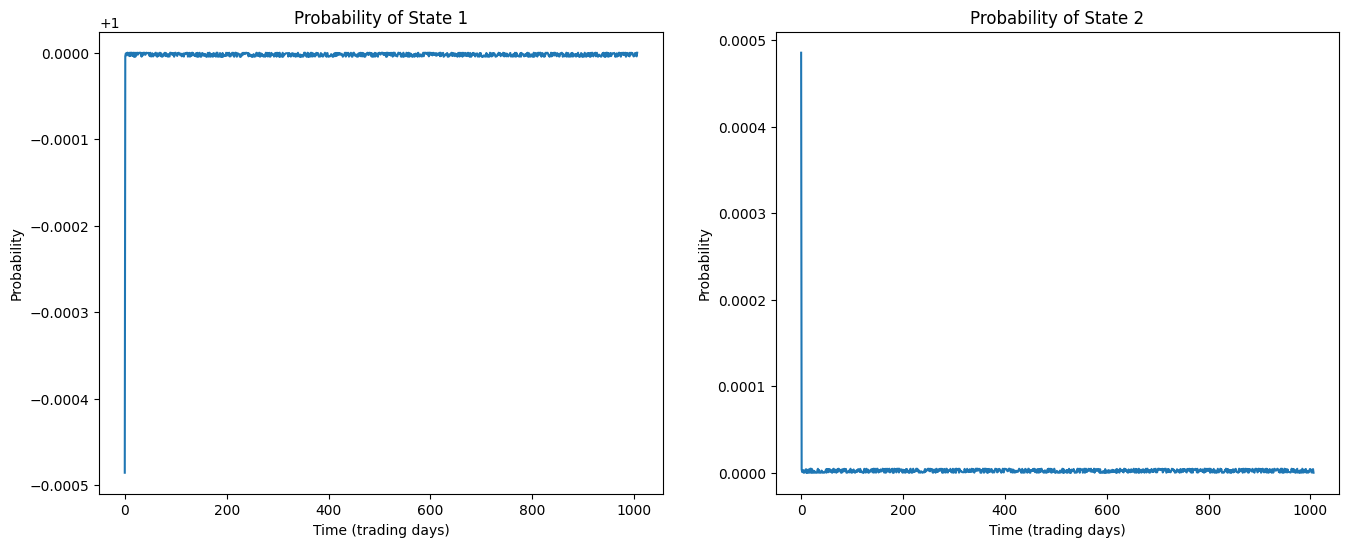

In [46]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = np.array([0.75])
sigma_hat0 = [0.80, 0.25] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.75
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.1, 0.8] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    #print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg_v3(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )



    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    log_like1, akiakie, schwarz = log_likelihood2(np.concatenate(([pi_hat0], xi_prob_t1[0:T-1])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 =  M_step_func_v3(xi_prob_T, sigma_hat0, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break

print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

If we force $\mu$ to be the same for both states, we get that we almost always stay in one state, which has $\mu = 0.7161077$ AND $\sigma_1 = 0.70797975, \sigma_2 = 0.3456121$.  We again almost always stay in state 1, though in this case we still have a $4.6 \times 10^{-6}$ chance of going to state 2. This suggets that forcing $\mu$ to be the same is not very useful, as we could instead just use a single state model.

The transition matrix is: \begin{bmatrix} 0.99999534 & 4.66036977 \times 10^{-6} \\ 0.999927326 & 7.26738104 \times 10^{-5} \end{bmatrix}

The log-likelihood value, -1428.8717, is a measure of how well a statistical model fits the observed data. It quantifies the likelihood of the model parameters producing the given data, with higher values indicating a better fit.

The AIC value, 2875.7434, is a criterion used for model selection among a set of competing models. It takes into account both the model's goodness of fit and its complexity, penalizing models with more parameters. Lower AIC values suggest a better balance between model fit and simplicity.

The BIC value, 2919.9760, is another model selection criterion similar to AIC but with a stronger penalty for model complexity. It tends to favor simpler models, encouraging parsimony in model selection.


# Hidden Markov Model, with an AR(1) process

Now we are going to extend the model so that we are assuming that the series is given by a Hidden Markov model with an AR(1) process -- that is,

$$y_t = \rho_i y_{t-1} + \epsilon_t$$

where $\epsilon_t$ follows a normal distribution with mean $\mu_i$, standard deviation $\sigma_i$, and $|\rho_i| < 1$.

$\mu_i$, $\sigma_i$, and $\rho_i$ depend on the realization of the hidden Markov process.


The marginal likelihood is given by

$$\phi({y_t - \mu_i - \rho_i y_{t-1} \over \sigma_i}) / \sigma_i$$



In [38]:
def likelihood_AR1(xi_prob, mu, sigma, rho, y, y1):
    phi = norm.pdf((y - mu - rho * y1) / sigma) / sigma
    y_like = np.dot(xi_prob, phi)

    return y_like, phi

We can incorporate this modified likelihood function into the forward algorithm.

In [39]:
# Hamilton filtering
def forward_alg_AR1(pi_hat0, N, T, P, mu, sigma, rho, Y):
    xi_prob_t = np.zeros((T-1, N))
    xi_prob_t1 = np.zeros((T-1, N))

    # Case t=1
    y_like, phi = likelihood_AR1(pi_hat0, mu, sigma, rho, Y[1], Y[0])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T-1):
        y_like, phi = likelihood_AR1(xi_prob_t1[tt - 1, :], mu, sigma, rho, Y[tt+1], Y[tt])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1

In order to update the $\mu_i$ and $\rho_i$ parameters in the maximization step, we stack them in a column vector; call this vector $\beta_i$

We write ${\bf z}_t = \pmatrix{1 \cr y_{t-1}}$

Then
$y_t = {\bf z}_t^T \beta_i + \epsilon_t$ where $\epsilon_t$ has zero mean and variance $\sigma_i^2$.

We can compute the updates for $\beta_i^{(k)}$ by finding the derivative of the log likelihood and setting it equal to zero. This yields the following first-order condition

$$\sum_{t=2}^T (y_t - {\bf z}^T \beta_i^{(k)}) {\bf z}_t \xi_{t|T}^{(k-1)}(i) = 0$$

The solution gives the optimal $\beta_i^(k)$, which can be expressed as follows.  Let

$${\bar z}_t(i) = z_t \sqrt{\xi_{t|T}^{(k-1)}(i)}$$
and let
$${\bar y}_t(i) = y_t \sqrt{\xi_{t|T}^{k-1}(i)}$$

Then:


$$ \beta_i^{(k)} = \left( \sum_{t=2}^T ({\bar z}_t(i)) ({\bar  z}_t(i))^T \right)^{-1} \left( \sum_{t=2}^T ({\bar z}_t(i)) ({\bar y}_t(i)) \right)$$

We can then calculate that:

$$\sigma_i^{(k)} = \sqrt{ \sum_{t=1}^T \xi_{t|T}^{(k-1)}(i) (y_t - {\bf z}_t^T \beta_i^(k))^2 \over \sum_{t=1}^T \xi_{t|T}(i)}$$

In [40]:
def M_step_func_AR1(xi_prob, P, N, T, Y):
    mu_hat = np.zeros((N))
    rho_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.sqrt(xi_prob[:, ss]) * Y[1:]
        z = np.stack((np.ones(T-1), Y[0:-1]), axis=1)
        xi_z = np.zeros((T-1, N))
        xi_z[:,0] = np.sqrt(xi_prob[:, ss]) * z[:,0]
        xi_z[:,1] = np.sqrt(xi_prob[:, ss]) * z[:,1]
        z_xi_z_inv = np.linalg.inv(np.dot(xi_z.T, xi_z))
        beta_hat = np.dot(z_xi_z_inv, np.dot(xi_z.T, xi_y))
        mu_hat[ss] = beta_hat[0]
        rho_hat[ss] = beta_hat[1]

        resid = Y[1:] - np.dot(z, beta_hat)
        xi_y_mu2 = np.dot(xi_prob[:, ss], resid**2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, rho_hat, sigma_hat, P_hat, pi_hat

We need to modify the definitions of the AIC and BIC to take into account the rho parameter.  

In [41]:
def log_likelihood2_AR1(xi_prob, T, pi_hat0, P, mu, sigma, rho, Y):
  y_like = np.zeros(T-1)
  for tt in range(0, T-1):
    y_like[tt], _ = likelihood_AR1(xi_prob[tt,:], mu, sigma, rho, Y[tt+1], Y[tt])
  sum_log_like = np.sum(np.log(y_like))
  n = len(Y) - 1
  k = (np.prod(mu.shape) + np.prod(sigma.shape) + np.prod(rho.shape))
  k += (np.prod(pi_hat0.shape) + np.prod(P.shape))
  akaike = 2 * k - 2 * sum_log_like
  schwarz = k * np.log(n) - 2 * sum_log_like
  return sum_log_like, akaike, schwarz

[0.47344508 1.12602677] [ 0.08213835 -0.01486775] [0.64712864 0.65303626] [[0.98026885 0.01973115]
 [0.0390518  0.9609482 ]] [1.00000000e+00 3.06451275e-50]
-1029.9052706876273 2083.8105413752546 2142.7753895831706



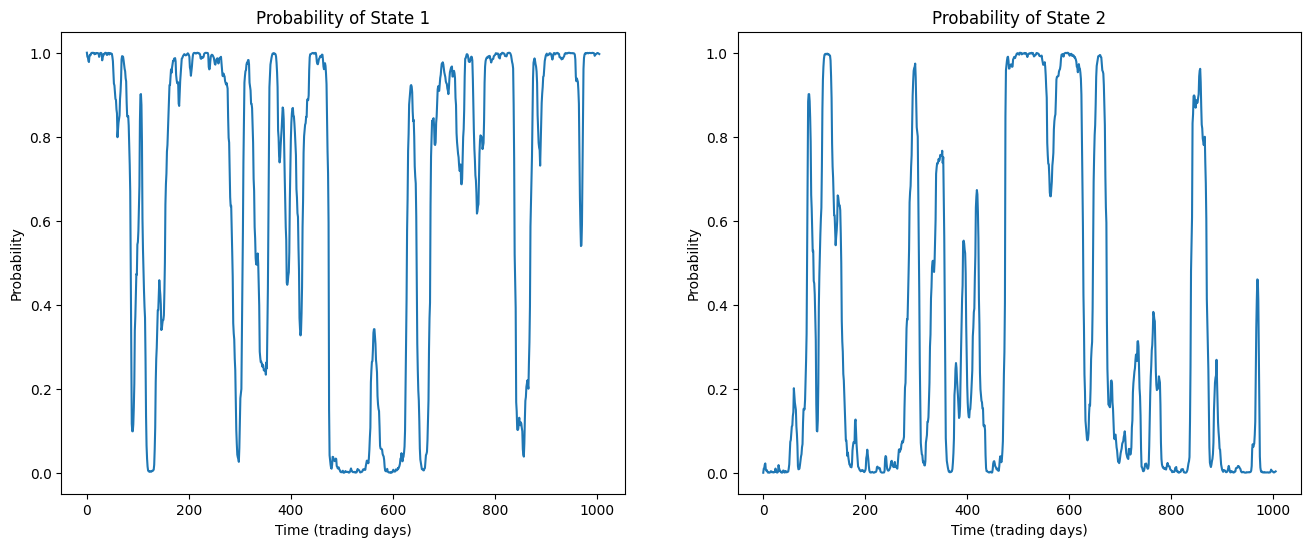

In [45]:
# Initialize parameters
T = len(YData)
N = 2

# SET INITIAL GUESSES

mu_hat0 = [0.5, 1.5] * np.ones((N))
rho_hat0 = [0.1, 0.1] * np.ones((N))
sigma_hat0 = [0.1, 0.1] * np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0, 0] = 0.75
P_hat0[0, 1] = 1 - P_hat0[0, 0]
P_hat0[1, 1] = 0.7
P_hat0[1, 0] = 1 - P_hat0[1, 1]

pi_hat0 = [0.5, 0.5] * np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-6
log_like0 = -1e8

for ite in range(0, itemax):
    #print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg_AR1(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, rho_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T-1, P_hat0, mu_hat0, sigma_hat0, YData
    )

    #print("")
    #plt.subplot(1, 2, 1)
    #plt.plot(xi_prob_T[:, 0])
    #plt.subplot(1, 2, 2)
    #plt.plot(xi_prob_T[:, 1])
    #fig = plt.gcf()
    #fig.set_size_inches(16, 6)
    #plt.show()
    #print("")

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T-1):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step

    log_like1, akiakie, schwarz = log_likelihood2_AR1(np.concatenate(([pi_hat0], xi_prob_t1[0:T-2])), T, pi_hat0, P_hat0, mu_hat0, sigma_hat0, rho_hat0, YData)
    diff = abs(log_like1 - log_like0) / abs(log_like0 + 1e-3)
    #print(f"Iteration {ite}")
    #print(f"Log Likelihood: {log_like1:.4f} Change: {diff:.2f}")

    if np.max(diff) > itetol:
        mu_hat0, rho_hat0, sigma_hat0, P_hat0, pi_hat0 = M_step_func_AR1(xi_prob_T, P_hat_T, N, T, YData) # update here
        log_like0 = log_like1
    else:
        print(mu_hat0, rho_hat0, sigma_hat0, P_hat0, pi_hat0)
        print(log_like1, akiakie, schwarz)
        break

print("")
plt.subplot(1, 2, 1)
plt.plot(xi_prob_T[:, 0])
plt.title("Probability of State 1")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
plt.subplot(1, 2, 2)
plt.plot(xi_prob_T[:, 1])
plt.title("Probability of State 2")
plt.ylabel("Probability")
plt.xlabel("Time (trading days)")
fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()
print("")

Our final values are:

* $(\mu_1, \rho_1, \sigma_1) = (0.4734451, 0.08213838, 0.647128877)$
* $(\mu_2, \rho_2, \sigma_2) = (1.1260265, -0.01486762, 0.65303615)$
* $P = \pmatrix{0.9802689  & 0.0197311 \cr 0.03905169 & 0.96094831}$
* $\pi_0 \approx(1, 0)$

That is, we have two states and almost always start in the first state. We switch between the two states with low probability (between 1.9 and 4 per cent).One state has a lower mean and one has a higher mean.  For both states, the standard deviation is about $0.65$, and the value of $\rho$ is low.

Introducing the $\rho$ factor allows us to decrease the loss to $-1029.9$ while still lowering the AIC and Bayesian Information Criteria relative to a model  that does not include $\rho$; hence the increased complexity is worth it.

The log-likelihood of -1029.905 indicates how well the model fits the data, with higher values indicating a better fit. The AIC value is 2083.810 suggests the trade-off between model fit and complexity, with lower values indicating a more parsimonious model. The BIC value is 2142.775; again, lower is better.